# Data Visualization 

In [81]:
import pandas as pd
import numpy as np

import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [82]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Are there any missing observations/data?

In [84]:
df = diamonds.copy()
df.isnull().values.any()

False

In [85]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [86]:
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


type, number of observations, number of variables etc. ;

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


Summary Statistics of Continuous Variables;

In [88]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


There are "ordinal variables"(cut) in the dataset, so the introduction must be done(!)

In [90]:
from pandas.api.types import CategoricalDtype
df.cut.astype(CategoricalDtype (ordered = True))

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [91]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In order to sort according to the structure of the data set;

In [92]:
cut_categories = ["Fair", "Good", "Very good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))

In [93]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very good' < 'Premium' < 'Ideal']

## Barplot - for "Categorical Variables"

Visualizing the frequencies of the classes of the categorical variable "cut";

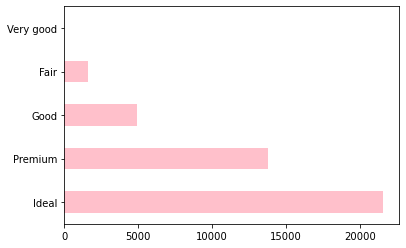

In [95]:
df["cut"].value_counts().plot.barh(color = "pink");

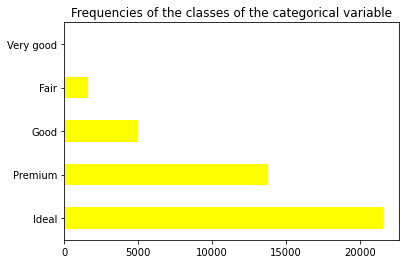

In [96]:
df["cut"].value_counts().plot.barh(color = "yellow").set_title("Frequencies of the classes of the categorical variable");

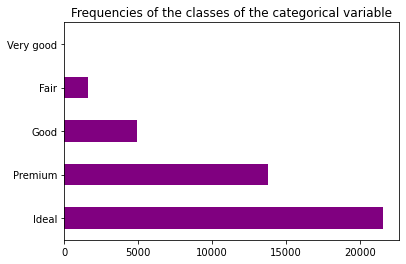

In [97]:
(df["cut"]
.value_counts()
.plot.barh(color = "purple")
.set_title("Frequencies of the classes of the categorical variable"));

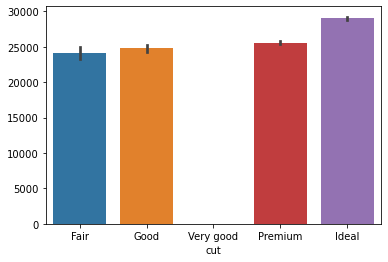

In [98]:
import seaborn as sns
sns.barplot(x = "cut", y = df.cut.index, data = df);

## Evaluation of the variables in the data set together

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns

from pandas.api.types import CategoricalDtype

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_categories = ["Fair", "Good", "Very good", "Premium", "İdeal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,NaN,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


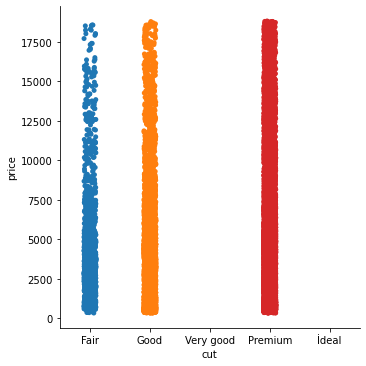

In [215]:
sns.catplot(x = "cut", y = "price", data = df);

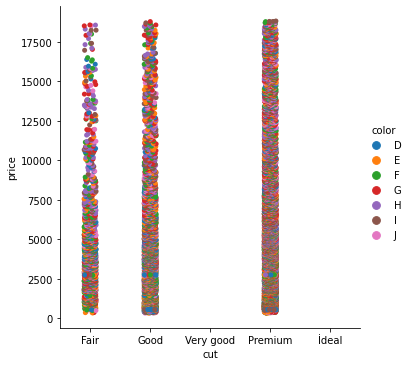

In [216]:
sns.catplot(x = "cut", y = "price", hue = "color", data = df);

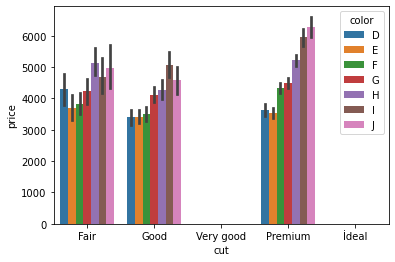

In [300]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

Verifying the aggregation process; First, we group them according to the cut, then the color variable, and take the average according to the price variable.

In [217]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very good  D                NaN
           E                NaN
           F                NaN
           G                NaN
           H                NaN
           I                NaN
           J                NaN
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
İdeal      D                NaN
           E                NaN
           F           

## Histogram and Density Graphs

They are data visualization techniques used to express the distribution of numerical variables.

C:\Users\R\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


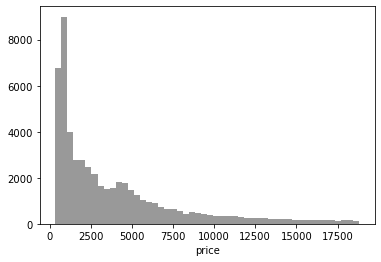

In [218]:
sns.distplot(df.price, kde = False, color = "black");

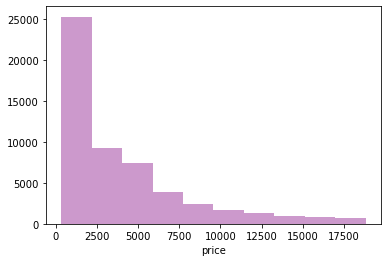

In [219]:
sns.distplot(df.price, bins = 10, kde = False, color = "purple");

To add the probability density function;

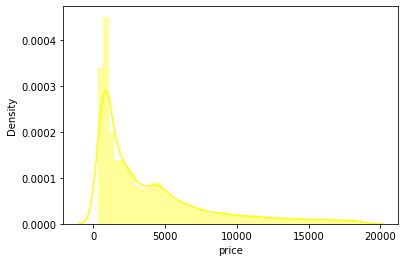

In [220]:
sns.distplot(df.price, color = "yellow");

C:\Users\R\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


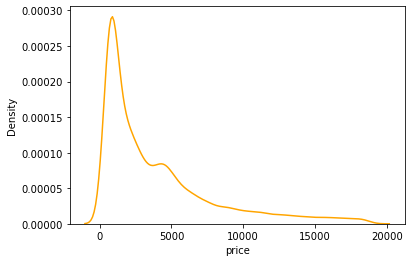

In [108]:
sns.distplot(df.price, hist = False, color = "orange");

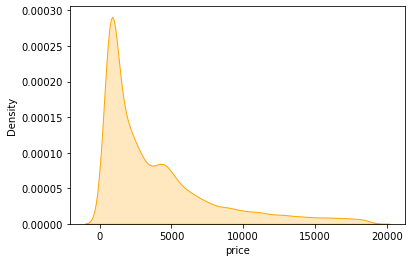

In [109]:
sns.kdeplot(df.price, shade = True, color = "orange");

Verifying the aggregation process;


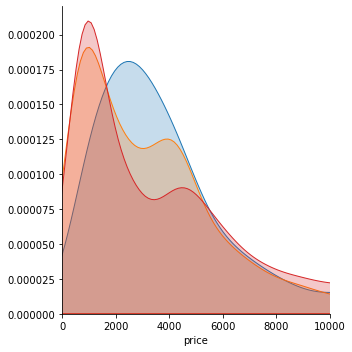

In [221]:
(sns
    .FacetGrid(df,
           hue = "cut",
           height = 5,
           xlim = (0, 10000))
    .map(sns.kdeplot, "price", shade = True);

We see clusters within each price.

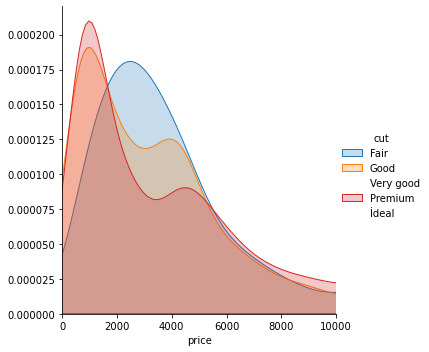

In [222]:
(sns
    .FacetGrid(df,
           hue = "cut",
           height = 5,
           xlim = (0, 10000))
    .map(sns.kdeplot, "price", shade = True)
    .add_legend()
);

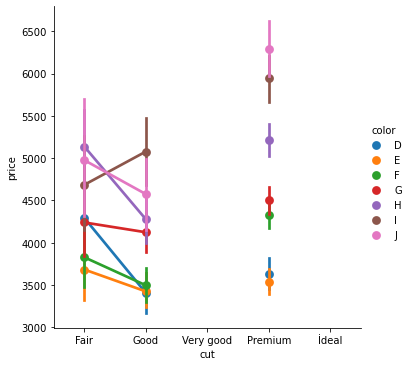

In [110]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## BOXPLOT

This is data visualization technique of numerical variables.

In [111]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [113]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [114]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [116]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [115]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

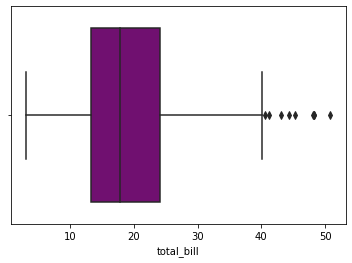

In [118]:
sns.boxplot(x = df["total_bill"], color = "purple");

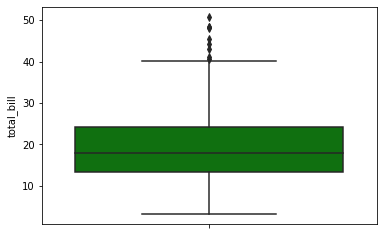

In [120]:
sns.boxplot(y = df["total_bill"], orient = "v", color = "green");

Verifying the aggregation process;

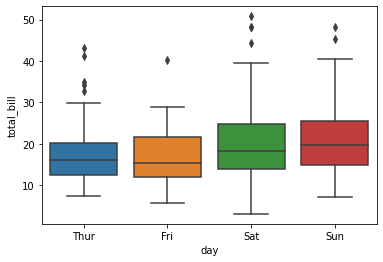

In [318]:
sns.boxplot(x = "day", y = "total_bill", data = df);

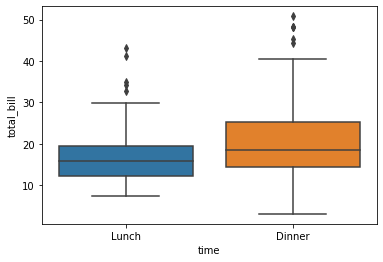

In [319]:
sns.boxplot(x = "time", y = "total_bill", data = df);

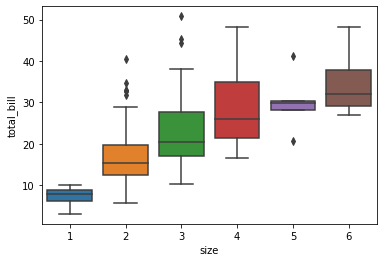

In [320]:
sns.boxplot(x = "size", y = "total_bill", data = df);

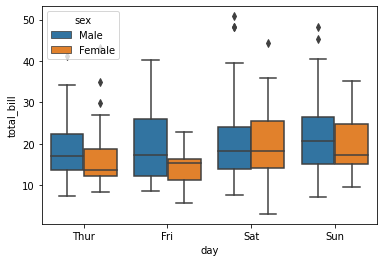

In [321]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

## VIOLIN PLOT

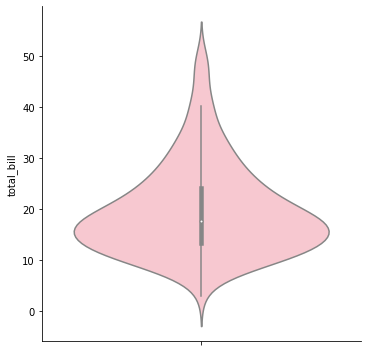

In [121]:
sns.catplot(y = "total_bill", kind = "violin", color = "pink", data = df);

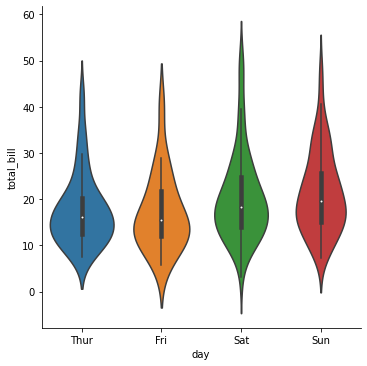

In [323]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

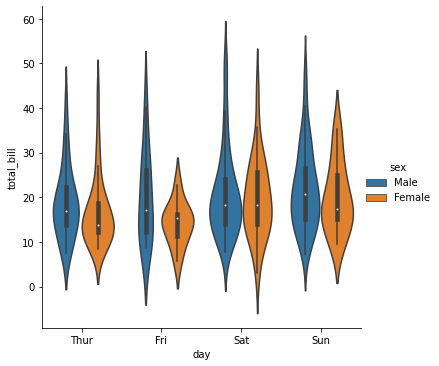

In [324]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

# Creation of the Correlation Graph

In [122]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


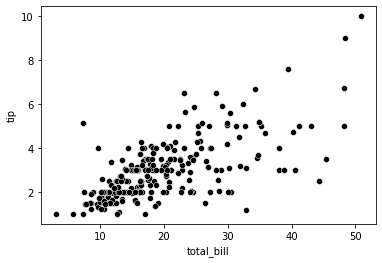

In [126]:
sns.scatterplot(x = "total_bill", y = "tip", color = "black", data = df);

As the total account increases, we see an increase in the tips.

Crossovers in correlation:

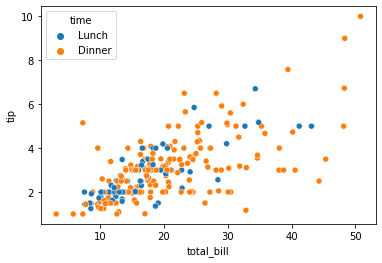

In [129]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

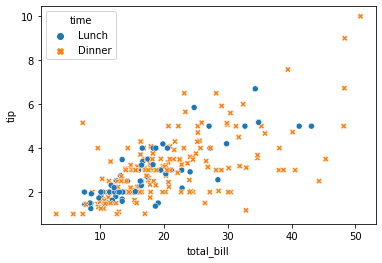

In [328]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

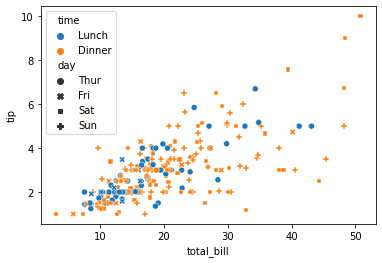

In [130]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "day", data = df);

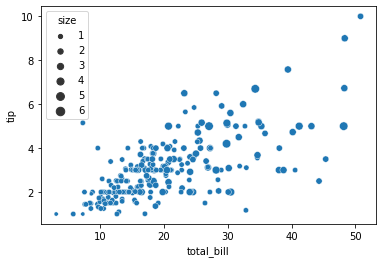

In [131]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = df);

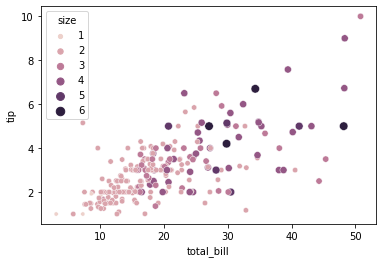

In [133]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

## Showing the Linear Relationship

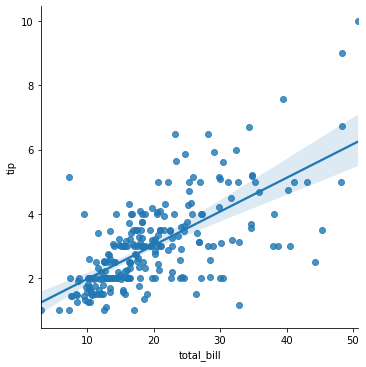

In [173]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = "total_bill", y = "tip", data = df);

Crossovers in correlation:

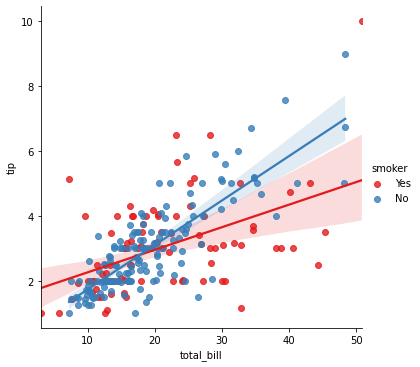

In [174]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", palette = "Set1", data = df);

If the slope is large, the intensity of the increase is high.

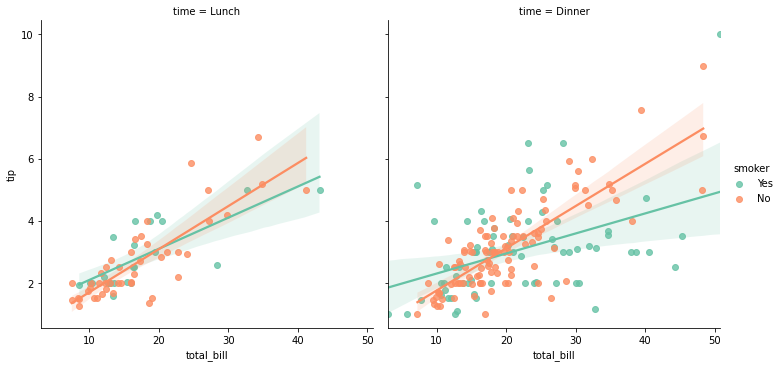

In [175]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", palette = "Set2", data = df);

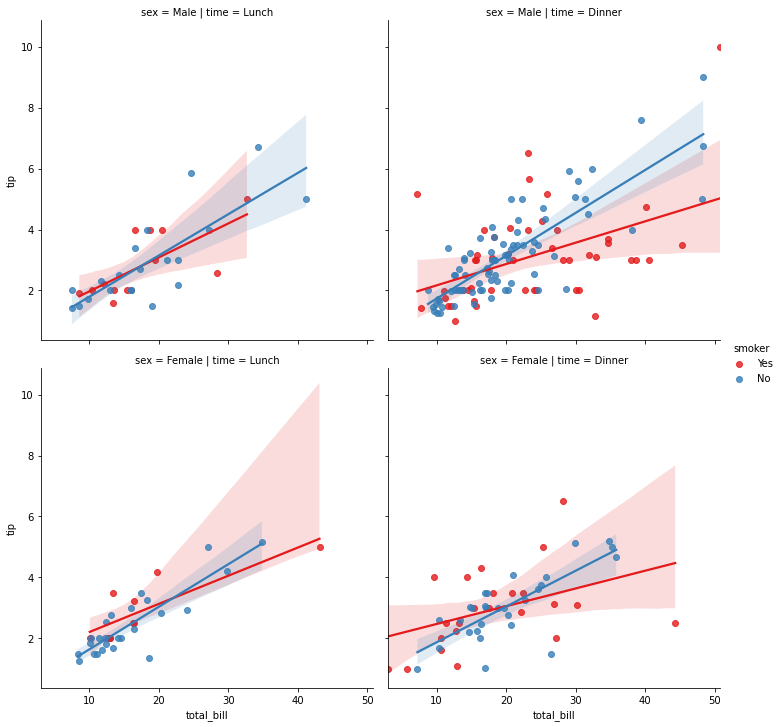

In [176]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", palette = "Set1", data = df);

# Scatter Plot Matrix

Graph showing the relationship between numeric variables

In [149]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [337]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

(Since there is no difference between the classes of Species, it can be used as an object.)

In [150]:
df.shape

(150, 5)

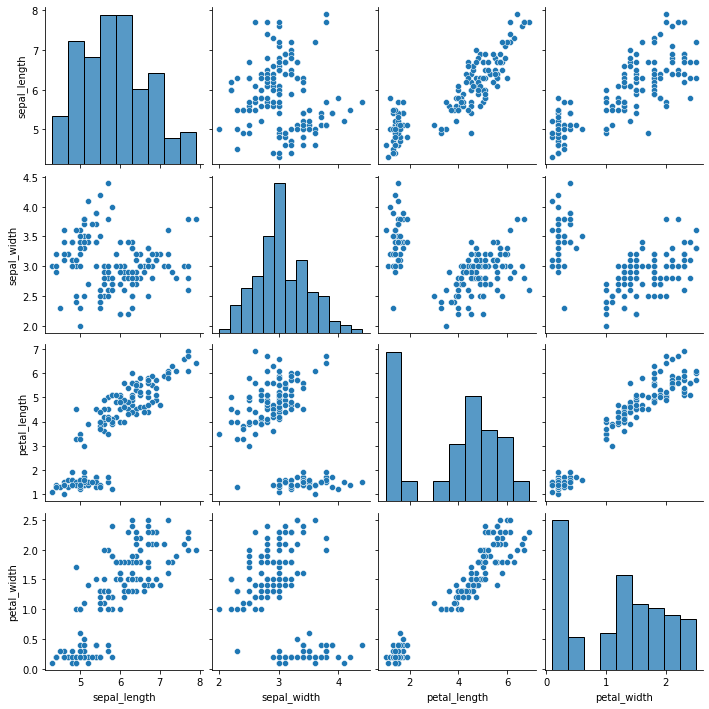

In [155]:
sns.pairplot(df);

The axis gives the distribution of the variable in the data set.
The meaning of clusters: It expresses that there is a structure formed by crossovers, that is, there are some subgroups that express different clusters.

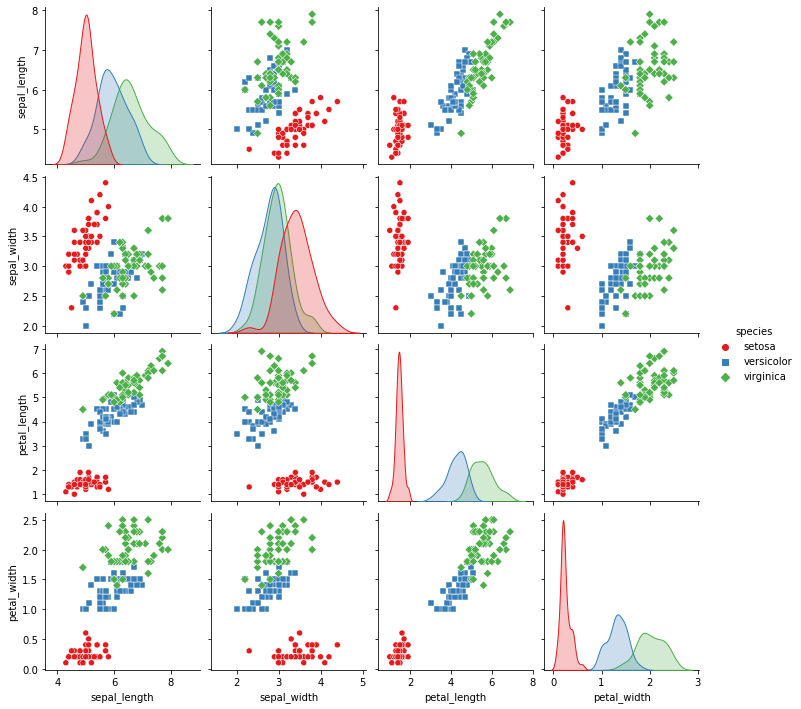

In [167]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "D"],  palette = "Set1");

Add linearity to a chart;

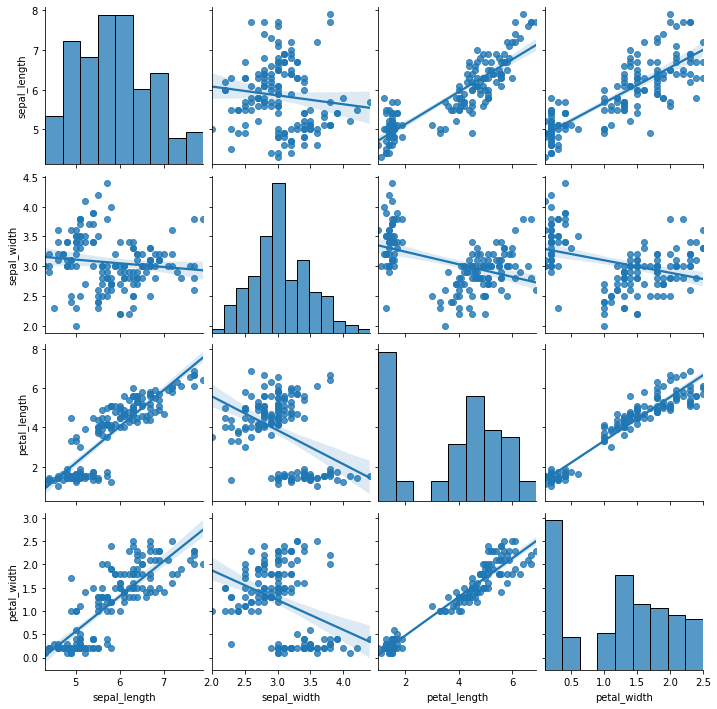

In [170]:
sns.pairplot(df, kind = "reg");

Correlation interpretation can be made by adding details to the chart;

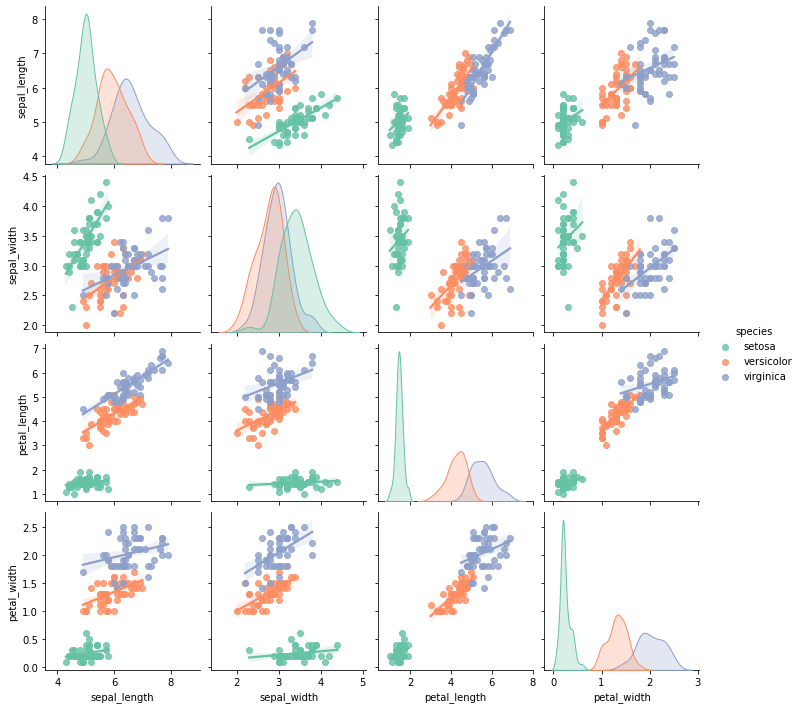

In [172]:
sns.pairplot(df, kind = "reg", hue = "species",  palette = "Set2");

# HEAT MAP

* In long-term data; that is, in data with a timeseries in it, 
* When we want to visualize the multi-class categorical variable in terms of a certain numerical variable, 
* To show large-scale, recurring events.

In [178]:
import pandas as pd
import seaborn as sns

flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [179]:
df.shape

(144, 3)

In [180]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [181]:
df = df.pivot("month", "year", "passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


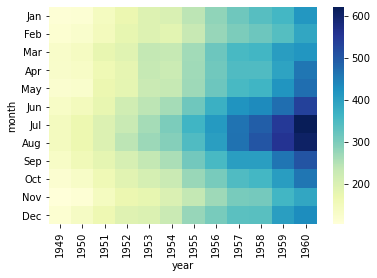

In [183]:
sns.heatmap(df, cmap="YlGnBu");

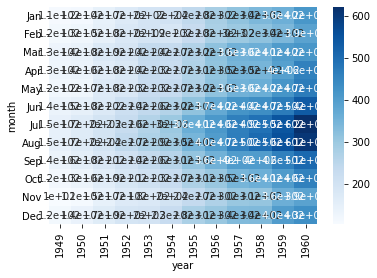

In [184]:
sns.heatmap(df, annot = True, cmap="Blues");

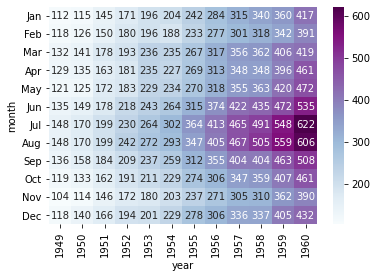

In [185]:
sns.heatmap(df, annot = True, fmt = "d", cmap="BuPu");

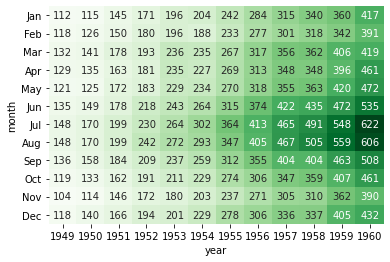

In [186]:
sns.heatmap(df, annot = True, fmt = "d", cbar = False, cmap="Greens");

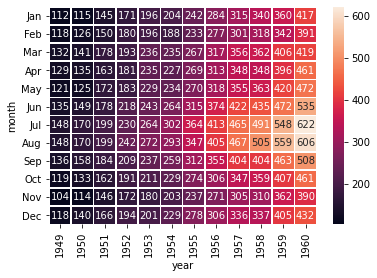

In [351]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

# Creating a Line Chart

* In data sets with time dependent variables,

* For the internet of things,

* To visualize data generated by machines

In [187]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [188]:
df.shape

(1064, 5)

Time point against signal;

In [189]:
df["timepoint"].describe().T

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [190]:
df["signal"].describe().T

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [356]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

(Equal count for each time point)

In [191]:
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

In [192]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


(So the variables are singular.)

In [193]:
df.groupby("timepoint")["signal"].describe().T

timepoint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.016662,-0.025002,-0.012873,0.034446,0.098194,0.137725,0.127515,0.075660,0.013420,-0.032041,-0.053685,-0.058194,-0.052526,-0.043532,-0.033660,-0.025880,-0.022414,-0.021368,-0.021867
std,0.028326,0.030641,0.035440,0.058260,0.092838,0.123353,0.137332,0.129704,0.104216,0.072728,0.053148,0.053828,0.056991,0.053598,0.045983,0.039092,0.035035,0.034797,0.036322
min,-0.064454,-0.082174,-0.110565,-0.089708,-0.046347,-0.017946,-0.054405,-0.108222,-0.181241,-0.152929,-0.176453,-0.238474,-0.255486,-0.224351,-0.169312,-0.134828,-0.131641,-0.121574,-0.103513
25%,-0.039169,-0.046299,-0.034944,-0.001157,0.030912,0.042762,0.022409,-0.016252,-0.049453,-0.075693,-0.078893,-0.093127,-0.090391,-0.069285,-0.055110,-0.050536,-0.041122,-0.042946,-0.046781
50%,-0.018382,-0.024533,-0.013183,0.028430,0.070166,0.096535,0.068850,0.032486,-0.012834,-0.038496,-0.052906,-0.045699,-0.042294,-0.031612,-0.022165,-0.018207,-0.020777,-0.017070,-0.020225
75%,0.003539,-0.005388,0.009318,0.061840,0.144911,0.211638,0.218919,0.144781,0.030396,0.008717,-0.015302,-0.022522,-0.016239,-0.012958,-0.006797,0.000486,-0.001380,-0.000026,-0.002821
max,0.074399,0.063558,0.077277,0.185581,0.346775,0.476055,0.564985,0.494787,0.337143,0.221716,0.089231,0.030528,0.055766,0.059510,0.050133,0.047102,0.057105,0.073757,0.090520


# LİNE PLOT

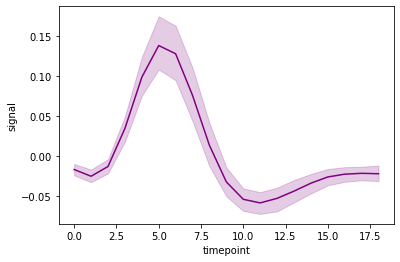

In [196]:
sns.lineplot(x = "timepoint", y = "signal", color = "purple", data = df);

Crossovers in correlation:

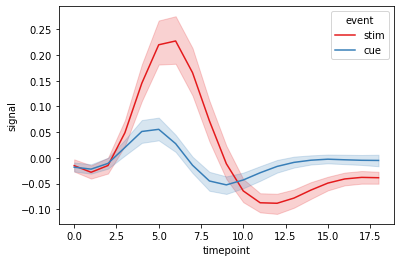

In [199]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", palette = "Set1", data = df);

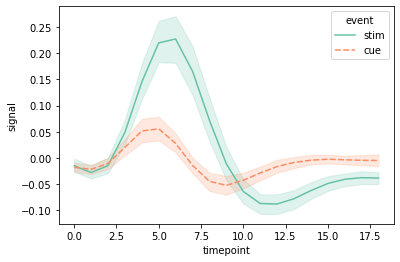

In [200]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", palette = "Set2", data = df);

To mark the average values;

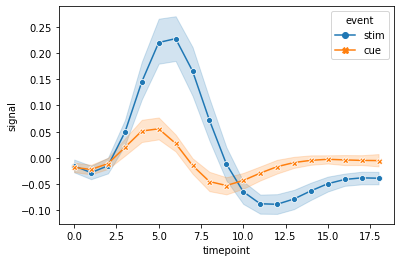

In [203]:
sns.lineplot (x = "timepoint",
              y = "signal",
              hue = "event",
              style = "event",
              markers = True, dashes = False, data =df);

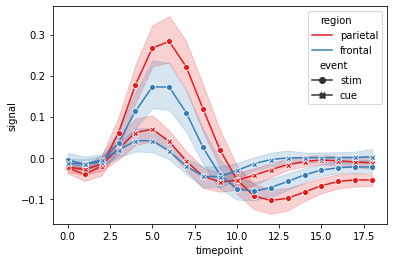

In [202]:
sns.lineplot (x = "timepoint",
              y = "signal",
              hue = "region",
              style = "event",
              markers = True, dashes = False, palette = "Set1", data =df);

# Simple Time Series Chart

In [204]:
import pandas_datareader as pr
df = pr.get_data_yahoo ("AAPL", start = "2000-01-01", end = "2021-08-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.854541
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.782494
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.793945
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.725238
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.759592


In [366]:
df.shape

(5447, 6)

In [206]:
closing = df["Close"]
closing.head()

Date
2000-01-03    0.999442
2000-01-04    0.915179
2000-01-05    0.928571
2000-01-06    0.848214
2000-01-07    0.888393
Name: Close, dtype: float64

If "Date" was not entered as a time variable;

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5447 entries, 2000-01-03 to 2021-08-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5447 non-null   float64
 1   Low        5447 non-null   float64
 2   Open       5447 non-null   float64
 3   Close      5447 non-null   float64
 4   Volume     5447 non-null   float64
 5   Adj Close  5447 non-null   float64
dtypes: float64(6)
memory usage: 297.9 KB


In [369]:
closing.index = pd.DatetimeIndex(closing.index)
closing.head()

Date
2000-01-03    0.999442
2000-01-04    0.915179
2000-01-05    0.928571
2000-01-06    0.848214
2000-01-07    0.888393
Name: Close, dtype: float64

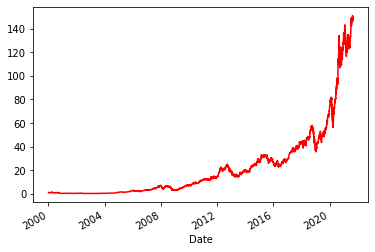

In [208]:
closing.plot(color = "red");

# MATPLOTLİB

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

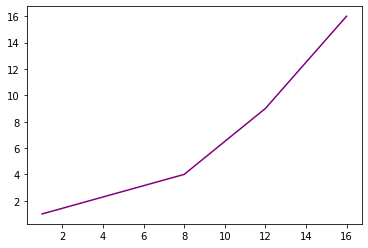

In [77]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.plot(x, y, color = "purple")
plt.show()

#### Adding a title;

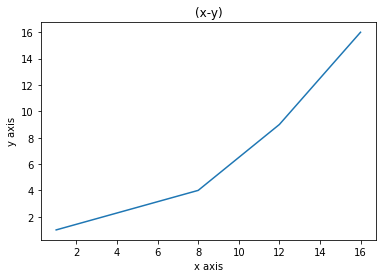

In [49]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.title("(x-y)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x, y)
plt.show()

#### Scaling the chart;

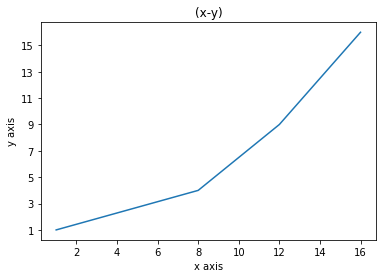

In [50]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.xticks([2, 4, 6, 8, 10, 12, 14, 16])   
plt.yticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.title("(x-y)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x, y);

No handles with labels found to put in legend.


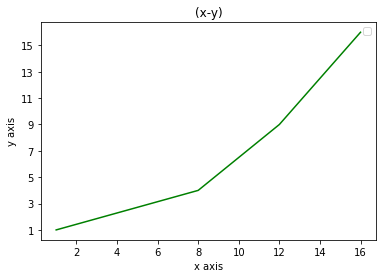

In [51]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.plot(x, y, color = "green")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16])   
plt.yticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.title("(x-y)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend();

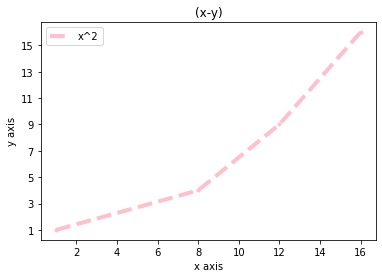

In [52]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.plot(x,y, label = "x^2", color = "pink", linewidth = 4, linestyle = "--", marker=".")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16])   
plt.yticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.title("(x-y)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend();

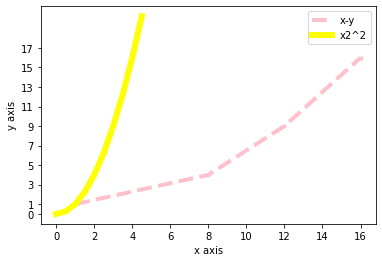

In [53]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.plot(x,y, color = "pink", linewidth = 4, linestyle = "--", marker=".", label = "x-y")
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])   
plt.yticks([0, 1, 3, 5, 7, 9, 11, 13, 15, 17])

plt.xlabel("x axis")
plt.ylabel("y axis")

x2 = np.arange(0, 5, 0.5)
plt.plot(x2, x2**2, color = "yellow", linewidth = 6, marker='.', label = "x2^2")

plt.legend();



#### Saving the chart to the computer,

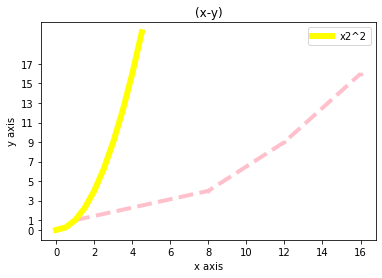

In [210]:
x = [1, 8, 12, 16]
y = [1, 4, 9, 16]

plt.plot(x,y, color = "pink", linewidth = 4, linestyle = "--", marker=".")
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])   
plt.yticks([0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
plt.title("(x-y)")
plt.xlabel("x axis")
plt.ylabel("y axis")

x2 = np.arange(0, 5, 0.5)
plt.plot(x2, x2**2, color = "yellow", linewidth = 6, marker=".", label = "x2^2")

plt.legend()

plt.savefig("save_graph.png", dpi = 150);

( png: portable network graph, dpi: Dots per inch)

## BARCHAT

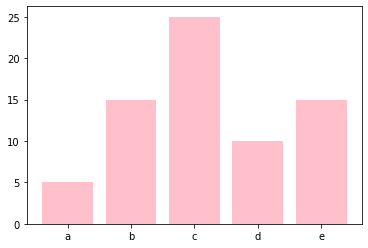

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

z = ["a", "b", "c", "d", "e"]
t = [5, 15, 25, 10, 15]
plt.bar(z, t, color = "pink");

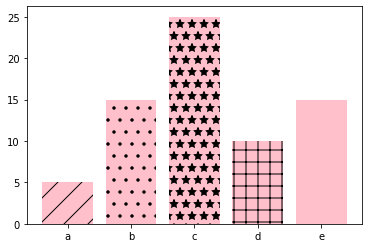

In [55]:
z = ["a", "b", "c", "d", "e"]
t = [5, 15, 25, 10, 15]
bars = plt.bar(z, t, color = "pink")
bars [0].set_hatch("/")
bars [1].set_hatch(".")
bars [2].set_hatch("*")
bars [3].set_hatch("+");

## Graph by calling data;

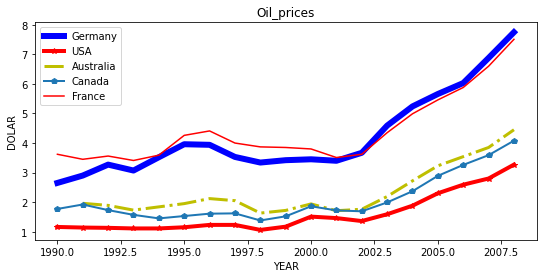

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Oil_prices.csv")

plt.figure(figsize = (9, 4))
plt.title("Oil_prices")
plt.plot(data["Year"], data["Germany"], "b-", linewidth = 6, label = "Germany")

plt.plot(data["Year"], data["USA"], "r-*", linewidth = 4, label = "USA")

plt.plot(data["Year"], data["Australia"], "y-.", linewidth = 3, label = "Australia")

plt.plot(data["Year"], data["Canada"], "p-", linewidth = 2, label = "Canada")

plt.plot(data["Year"], data["France"], "r-", label = "France")

plt.xlabel("YEAR")
plt.ylabel("DOLAR")
plt.legend();